In [111]:
import pandas as pd

In [112]:
# Load the CSV files into DataFrames
df1 = pd.read_csv('dataset/lower_income1.csv')
df2 = pd.read_csv('dataset/upper_income1.csv')

print("Lower income csv columns:", df1.columns)
print("Upper income csv columns:", df2.columns)

Lower income csv columns: Index(['Amount', 'Category', 'Type', 'Date'], dtype='object')
Upper income csv columns: Index(['Date', 'Category', 'Amount', 'Type'], dtype='object')


In [113]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract month and year
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

In [114]:
# Group by month and category
monthly_spending_lower = df1.groupby(['Year', 'Month', 'Category'])['Amount'].sum().reset_index()
monthly_spending_upper = df2.groupby(['Year', 'Month', 'Category'])['Amount'].sum().reset_index()

In [115]:
# Add total monthly spending for normalization
monthly_spending_lower['Total_Monthly_Spend'] = monthly_spending_lower.groupby(['Year', 'Month'])['Amount'].transform('sum')
monthly_spending_upper['Total_Monthly_Spend'] = monthly_spending_upper.groupby(['Year', 'Month'])['Amount'].transform('sum')

In [116]:
# Calculate percentage of spending per category
monthly_spending_lower['Percent_Spend'] = (monthly_spending_lower['Amount'] / monthly_spending_lower['Total_Monthly_Spend']) * 100
monthly_spending_upper['Percent_Spend'] = (monthly_spending_upper['Amount'] / monthly_spending_upper['Total_Monthly_Spend']) * 100

In [117]:
print("Lower:")
print(monthly_spending_lower.head())

Lower:
   Year  Month          Category        Amount  Total_Monthly_Spend  \
0  2021     11            Beauty   1568.000000         98669.891969   
1  2021     11     Entertainment   2764.738178         98669.891969   
2  2021     11              Food  17350.000000         98669.891969   
3  2021     11  Health & Fitness   3200.000000         98669.891969   
4  2021     11         Household  28107.785561         98669.891969   

   Percent_Spend  
0       1.589137  
1       2.802008  
2      17.583885  
3       3.243137  
4      28.486689  


In [118]:
print("Upper:")
print(monthly_spending_upper.head())

Upper:
   Year  Month          Category     Amount  Total_Monthly_Spend  \
0  2020      1            Beauty  1475.5800           24566.3225   
1  2020      1     Entertainment  4308.4125           24566.3225   
2  2020      1              Food  5458.5100           24566.3225   
3  2020      1  Health & Fitness  2370.3400           24566.3225   
4  2020      1         Household  3663.2200           24566.3225   

   Percent_Spend  
0       6.006516  
1      17.537881  
2      22.219484  
3       9.648738  
4      14.911552  


In [119]:
baseline_lower = {
    'Household': 30,
    'Food': 40,
    'Shopping': 7,
    'Transportation':5,
    'Health & Fitness': 5,
    'Entertainment': 5,
    'Beauty': 4,
    'Investment': 4
}


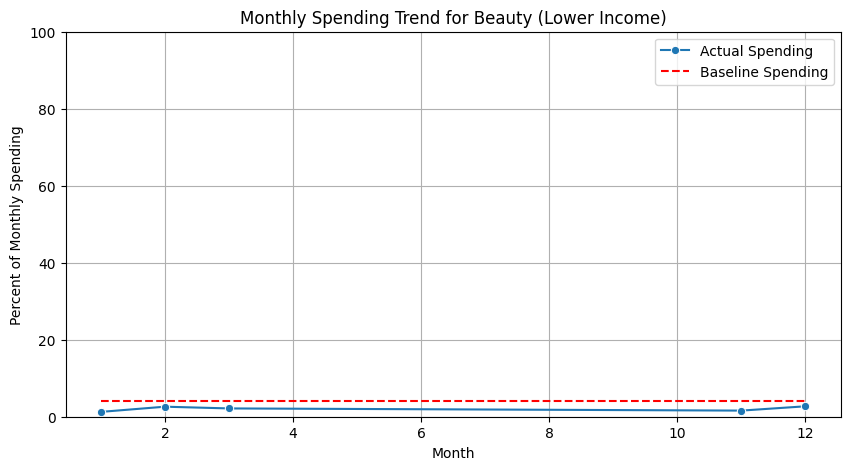

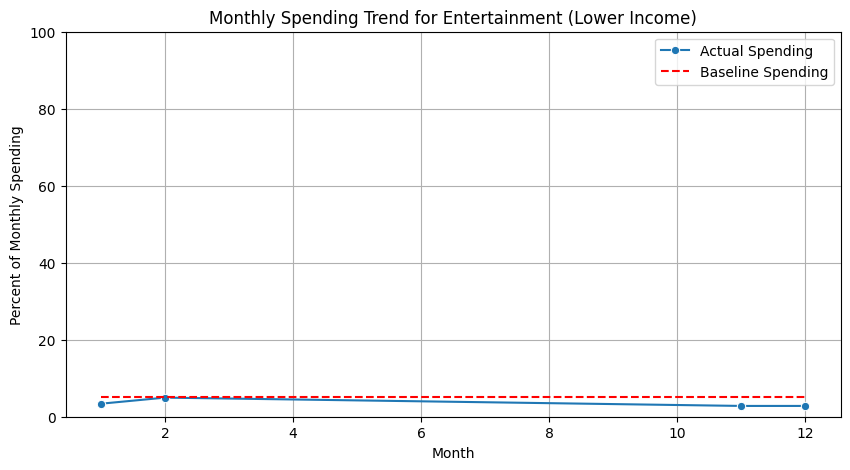

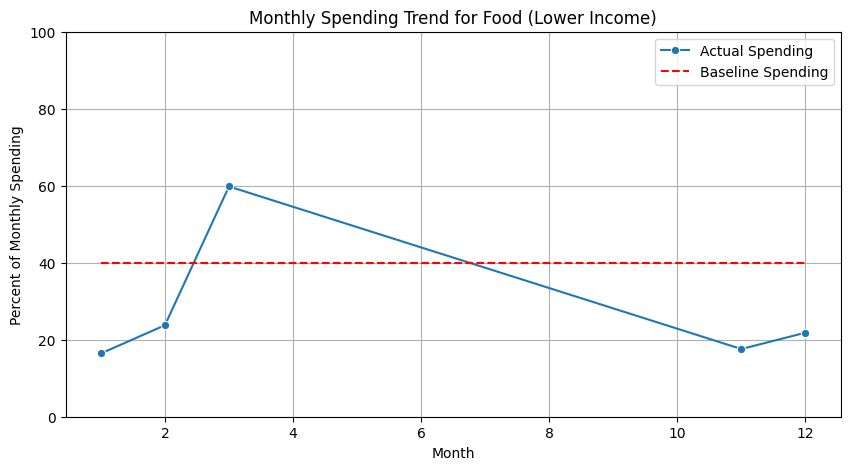

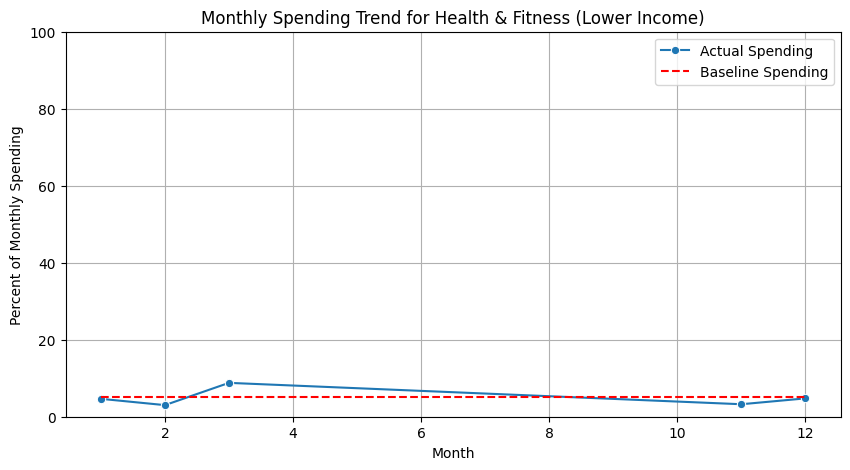

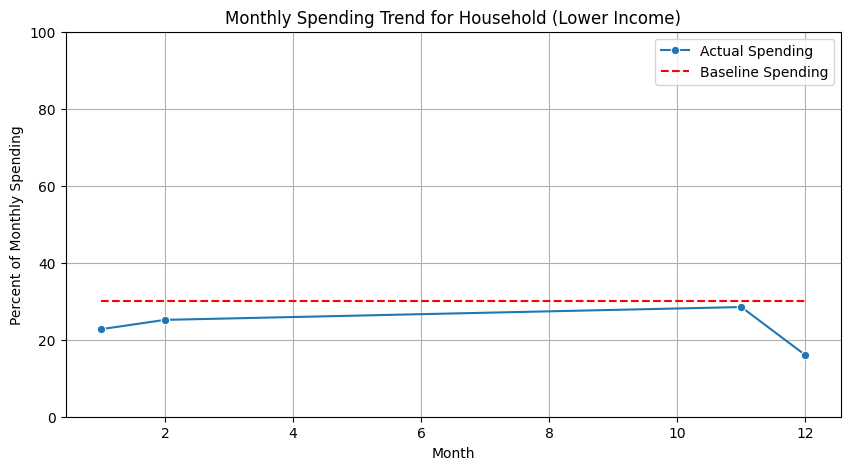

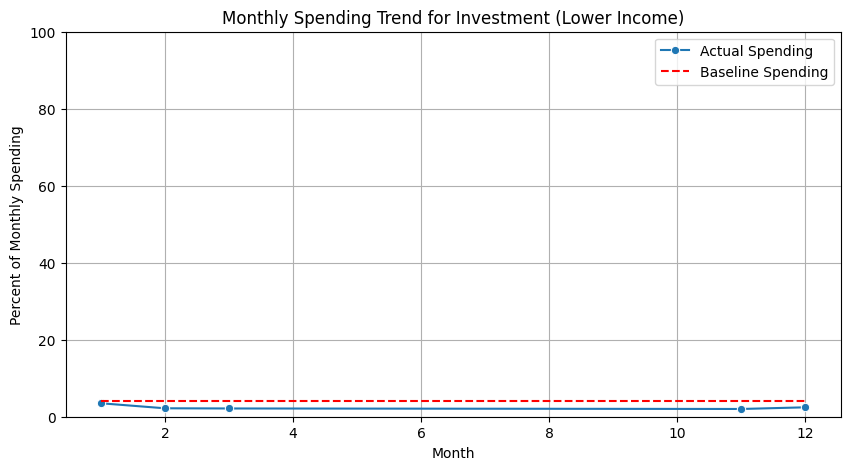

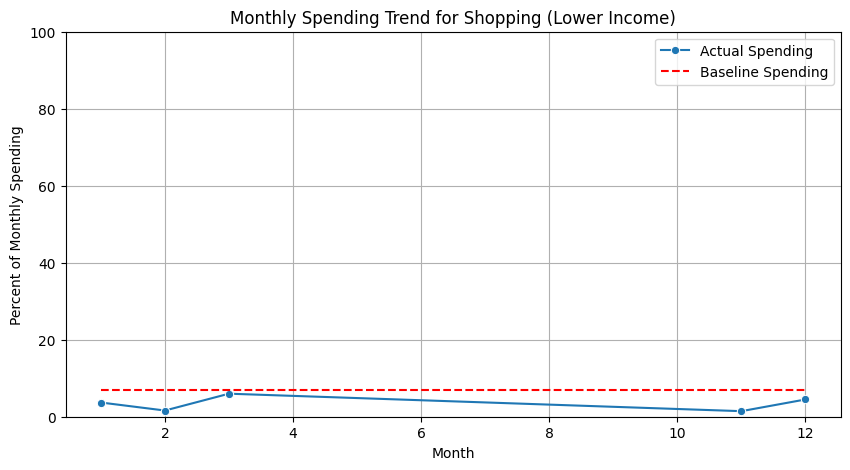

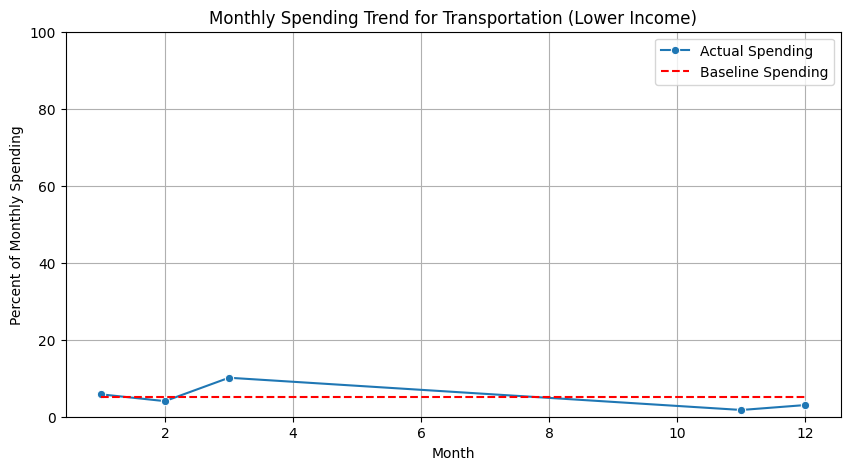

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique categories
categories = monthly_spending_lower['Category'].unique()

# Create a separate plot for each category
for category in categories:
    # Filter data for the current category
    if category!='Salary':
        category_data = monthly_spending_lower[monthly_spending_lower['Category'] == category]
        
        # Create a baseline DataFrame for the category
        baseline_data = pd.DataFrame({
            'Month': category_data['Month'].unique(),
            'Baseline': [baseline_lower.get(category, 0)] * len(category_data['Month'].unique())
        })
        
        # Plot the data
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=category_data, x='Month', y='Percent_Spend', label='Actual Spending', marker='o')
        sns.lineplot(data=baseline_data, x='Month', y='Baseline', label='Baseline Spending', linestyle='--', color='red')
        plt.title(f'Monthly Spending Trend for {category} (Lower Income)')
        plt.ylabel('Percent of Monthly Spending')
        plt.xlabel('Month')
        plt.ylim(0, 100)  # Ensure the y-axis has the same scale for all charts
        plt.legend()
        plt.grid(True)
        plt.show()


In [121]:
# Loop through each category and print the actual spending percentages
for category in categories:
    # Filter data for the current category
    category_data = monthly_spending_lower[monthly_spending_lower['Category'] == category]
    
    print(f"Actual Spending for {category}:")
    print(category_data[['Month', 'Percent_Spend']])
    print("-" * 50)
    
    # Print the baseline for comparison
    baseline_value = baseline_lower.get(category, 0)
    print(f"Baseline Spending for {category}: {baseline_value}%\n")
    print("=" * 50)

Actual Spending for Beauty:
    Month  Percent_Spend
0      11       1.589137
9      12       2.707200
18      1       1.256762
27      2       2.604319
36      3       2.154803
--------------------------------------------------
Baseline Spending for Beauty: 4%

Actual Spending for Entertainment:
    Month  Percent_Spend
1      11       2.802008
10     12       2.802266
19      1       3.380036
28      2       4.961147
--------------------------------------------------
Baseline Spending for Entertainment: 5%

Actual Spending for Food:
    Month  Percent_Spend
2      11      17.583885
11     12      21.826232
20      1      16.429081
29      2      23.760541
37      3      59.806775
--------------------------------------------------
Baseline Spending for Food: 40%

Actual Spending for Health & Fitness:
    Month  Percent_Spend
3      11       3.243137
12     12       4.762844
21      1       4.648738
30      2       3.011797
38      3       8.795114
-------------------------------------

In [122]:
def compare_to_baseline(row, baseline):
    category = row['Category']
    actual = row['Percent_Spend']
    expected = baseline.get(category, 0)
    deviation = actual - expected
    return deviation  # Positive = overspending, Negative = underspending

monthly_spending_lower['Deviation'] = monthly_spending_lower.apply(compare_to_baseline, axis=1, baseline=baseline_lower)

In [123]:
# Filter out "Salary"
filtered_data = monthly_spending_lower[monthly_spending_lower['Category'] != 'Salary']

# Display the deviations for each category
for category in filtered_data['Category'].unique():
    category_data = filtered_data[filtered_data['Category'] == category]
    print(f"Deviation for {category}:")
    print(category_data[['Month', 'Percent_Spend', 'Deviation']])
    print("-" * 50)


Deviation for Beauty:
    Month  Percent_Spend  Deviation
0      11       1.589137  -2.410863
9      12       2.707200  -1.292800
18      1       1.256762  -2.743238
27      2       2.604319  -1.395681
36      3       2.154803  -1.845197
--------------------------------------------------
Deviation for Entertainment:
    Month  Percent_Spend  Deviation
1      11       2.802008  -2.197992
10     12       2.802266  -2.197734
19      1       3.380036  -1.619964
28      2       4.961147  -0.038853
--------------------------------------------------
Deviation for Food:
    Month  Percent_Spend  Deviation
2      11      17.583885 -22.416115
11     12      21.826232 -18.173768
20      1      16.429081 -23.570919
29      2      23.760541 -16.239459
37      3      59.806775  19.806775
--------------------------------------------------
Deviation for Health & Fitness:
    Month  Percent_Spend  Deviation
3      11       3.243137  -1.756863
12     12       4.762844  -0.237156
21      1       4.648738

In [124]:
baseline_upper = {
    'Household': 11,
    'Food': 10,
    'Shopping': 13,
    'Transportation':11,
    'Health & Fitness': 10,
    'Entertainment': 18,
    'Beauty': 8,
    'Investment': 19
}

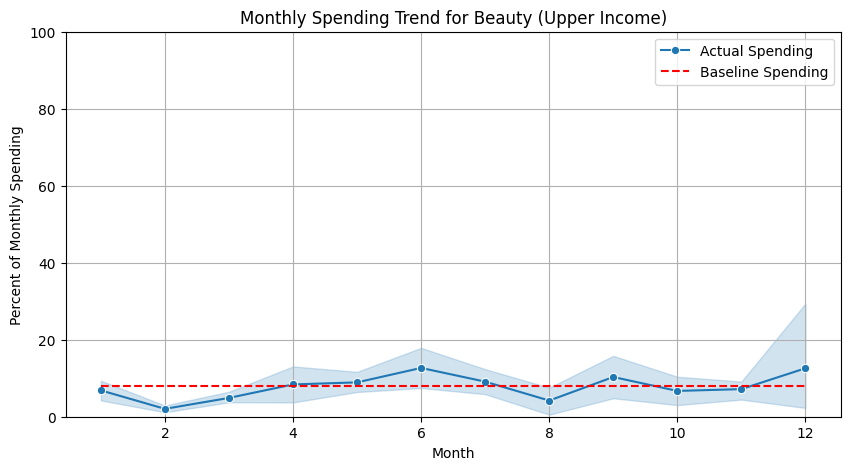

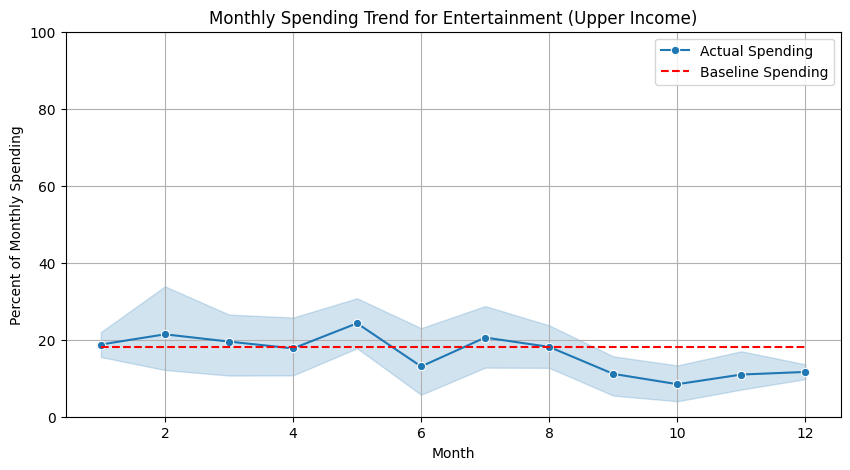

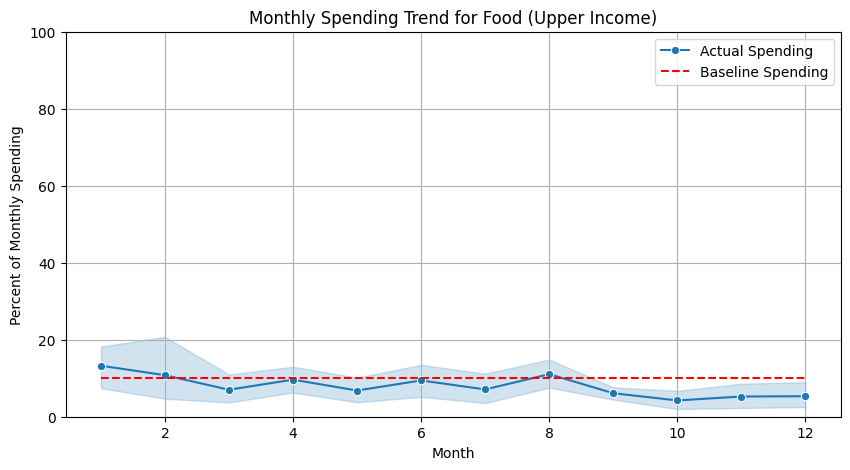

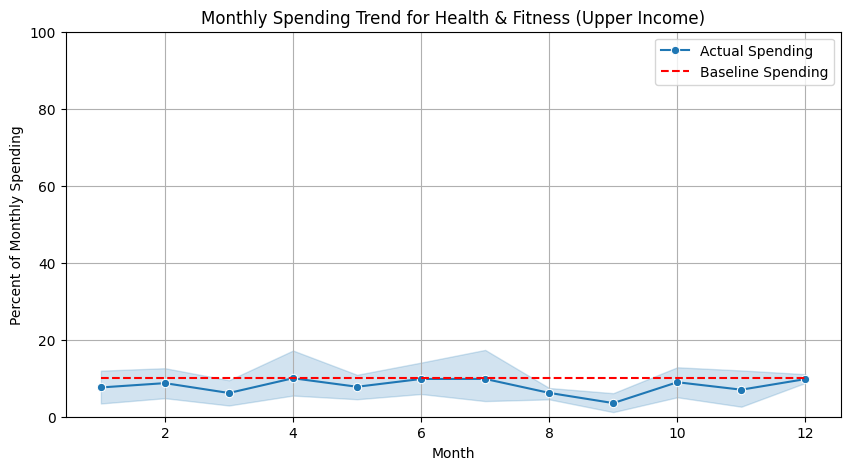

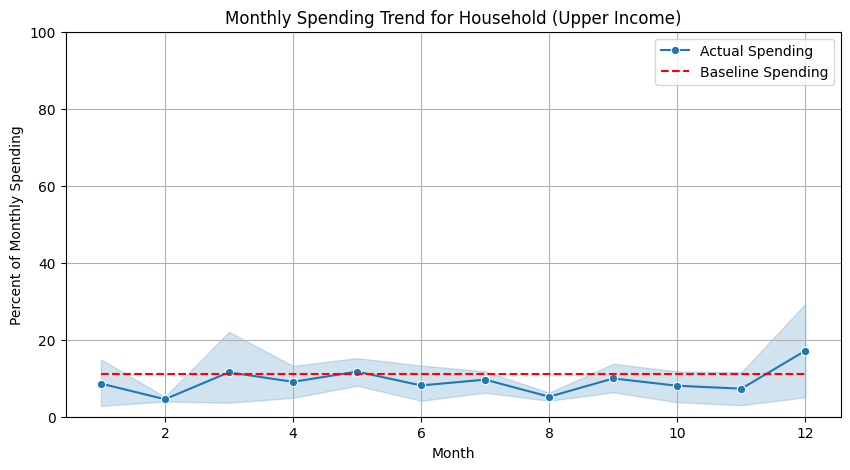

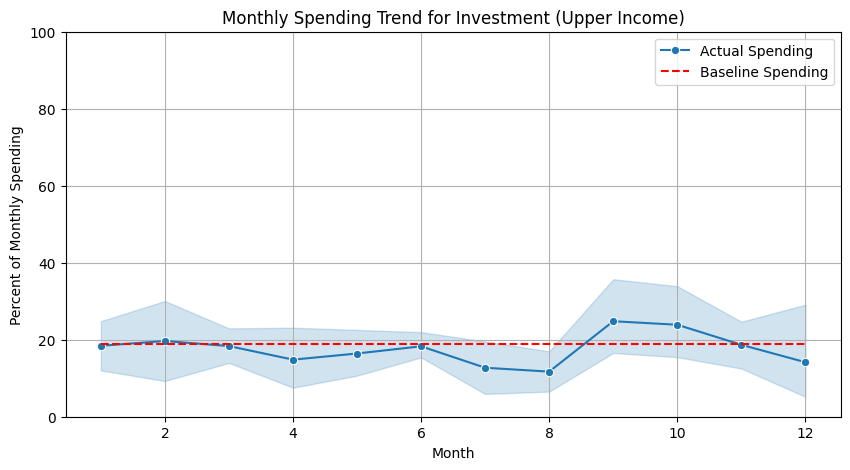

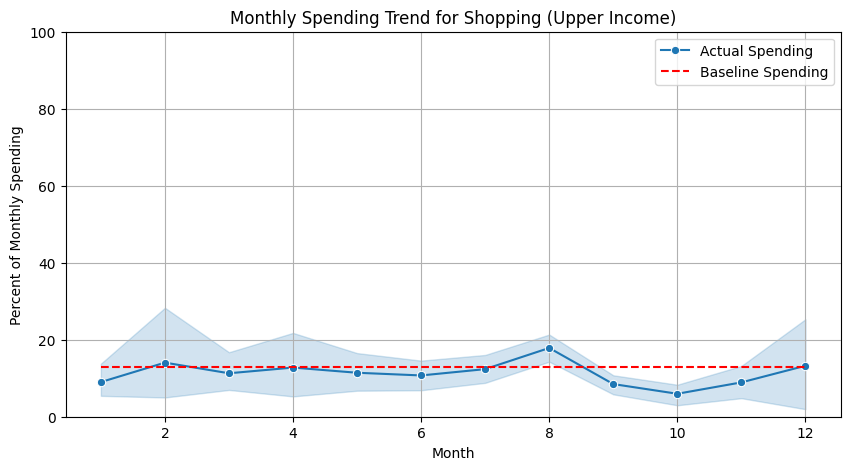

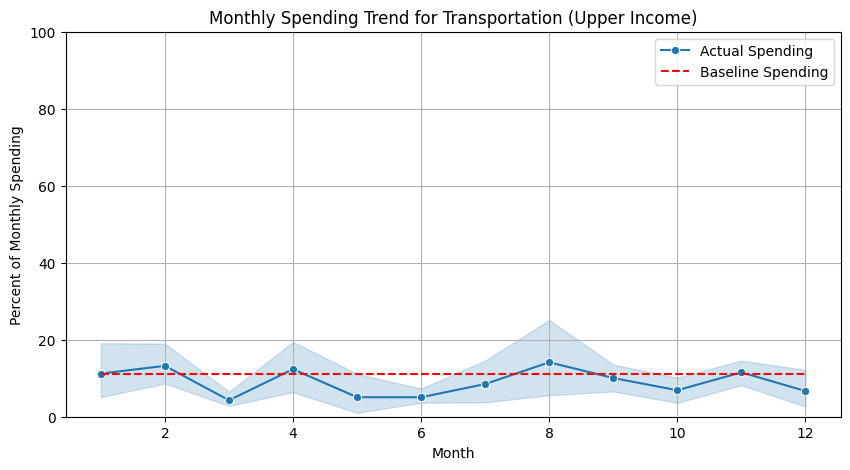

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique categories
categories = monthly_spending_upper['Category'].unique()

# Create a separate plot for each category
for category in categories:
    # Filter data for the current category
    if category!='Salary':
        category_data = monthly_spending_upper[monthly_spending_upper['Category'] == category]
        
        # Create a baseline DataFrame for the category
        baseline_data = pd.DataFrame({
            'Month': category_data['Month'].unique(),
            'Baseline': [baseline_upper.get(category, 0)] * len(category_data['Month'].unique())
        })
        
        # Plot the data
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=category_data, x='Month', y='Percent_Spend', label='Actual Spending', marker='o')
        sns.lineplot(data=baseline_data, x='Month', y='Baseline', label='Baseline Spending', linestyle='--', color='red')
        plt.title(f'Monthly Spending Trend for {category} (Upper Income)')
        plt.ylabel('Percent of Monthly Spending')
        plt.xlabel('Month')
        plt.ylim(0, 100)  # Ensure the y-axis has the same scale for all charts
        plt.legend()
        plt.grid(True)
        plt.show()


In [126]:
monthly_spending_upper['Deviation'] = monthly_spending_upper.apply(compare_to_baseline, axis=1, baseline=baseline_upper)

# Filter out "Salary"
filtered_data = monthly_spending_upper[monthly_spending_upper['Category'] != 'Salary']

# Display the deviations for each category
for category in filtered_data['Category'].unique():
    category_data = filtered_data[filtered_data['Category'] == category]
    print(f"Deviation for {category}:")
    print(category_data[['Month', 'Percent_Spend', 'Deviation']])
    print("-" * 50)

Deviation for Beauty:
     Month  Percent_Spend  Deviation
0        1       6.006516  -1.993484
8        2       3.454618  -4.545382
17       3       4.162536  -3.837464
25       4      10.342255   2.342255
33       5       7.054072  -0.945928
41       6      17.064460   9.064460
49       7       8.954344   0.954344
57       8       7.546870  -0.453130
66       9       2.864479  -5.135521
74      10       3.406500  -4.593500
83      11       9.504101   1.504101
92      12       6.196214  -1.803786
100      1       9.877550   1.877550
107      2       2.774663  -5.225337
115      3       7.961128  -0.038872
124      4      10.735403   2.735403
133      5       8.085063   0.085063
142      6      18.710269  10.710269
150      7      13.654298   5.654298
157      8       0.530150  -7.469850
165      9      13.506764   5.506764
173     10      12.496584   4.496584
180     11       9.352722   1.352722
189     12       5.948152  -2.051848
196      1       4.654207  -3.345793
204      2      

In [127]:
# Define the thresholds for deviation
threshold = 5  # Define the threshold for acceptable deviation, e.g., 5%

# Function to label as 'Good' or 'Bad' based on deviation
def label_spending(row, threshold):
    if abs(row['Deviation']) > threshold:
        return 'Bad'
    else:
        return 'Good'

In [128]:
# Apply the label_spending function to both lower and upper income datasets
monthly_spending_lower['Label'] = monthly_spending_lower.apply(label_spending, axis=1, threshold=threshold)
monthly_spending_upper['Label'] = monthly_spending_upper.apply(label_spending, axis=1, threshold=threshold)

# Save the labeled data back to CSV
monthly_spending_lower.to_csv('dataset/monthly_spending_lower_labeled.csv', index=False)
monthly_spending_upper.to_csv('dataset/monthly_spending_upper_labeled.csv', index=False)

# Display the labeled data (Optional)
print("Lower Income Monthly Spending with Labels:")
print(monthly_spending_lower[['Month', 'Category', 'Percent_Spend', 'Deviation', 'Label']])

print("\nUpper Income Monthly Spending with Labels:")
print(monthly_spending_upper[['Month', 'Category', 'Percent_Spend', 'Deviation', 'Label']])

Lower Income Monthly Spending with Labels:
    Month          Category  Percent_Spend  Deviation Label
0      11            Beauty       1.589137  -2.410863  Good
1      11     Entertainment       2.802008  -2.197992  Good
2      11              Food      17.583885 -22.416115   Bad
3      11  Health & Fitness       3.243137  -1.756863  Good
4      11         Household      28.486689  -1.513311  Good
5      11        Investment       2.013177  -1.986823  Good
6      11            Salary      41.088147  41.088147   Bad
7      11          Shopping       1.441711  -5.558289   Bad
8      11    Transportation       1.752108  -3.247892  Good
9      12            Beauty       2.707200  -1.292800  Good
10     12     Entertainment       2.802266  -2.197734  Good
11     12              Food      21.826232 -18.173768   Bad
12     12  Health & Fitness       4.762844  -0.237156  Good
13     12         Household      15.981182 -14.018818   Bad
14     12        Investment       2.443339  -1.556661  Go

In [129]:
print("Upper months: ",monthly_spending_upper['Month'].unique())
print("Upper years: ",monthly_spending_upper['Year'].unique())
print("Lower months: ",monthly_spending_lower['Month'].unique())

Upper months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Upper years:  [2020 2021 2022 2023 2024]
Lower months:  [11 12  1  2  3]


# Models

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
# from xgboost import XGBClassifier

In [131]:
monthly_spending_lower = pd.read_csv('dataset/monthly_spending_lower_labeled.csv')
monthly_spending_upper = pd.read_csv('dataset/monthly_spending_upper_labeled.csv')

In [132]:
#Decision Tree
# Load the data
# Assuming monthly_spending_lower is your dataset
df = monthly_spending_lower.copy()

# Encode the Label column (Good = 1, Bad = 0)
df['Label'] = df['Label'].map({'Good': 1, 'Bad': 0})

# One-hot encode the Category column
df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Label', 'Month'])  # Drop Label and Month for training
y = df_encoded['Label']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

Decision Tree Accuracy: 0.8888888888888888


In [133]:
# Define parameter distribution for Decision Tree
param_dist_tree = {
    'max_depth': randint(10, 50),  # Depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Initialize RandomizedSearchCV for Decision Tree
random_search_tree = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_tree,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Perform random search
random_search_tree.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
print("Best Hyperparameters (Decision Tree):", random_search_tree.best_params_)

# Best cross-validation score
print("Best Cross-Validation Score (Decision Tree):", random_search_tree.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=gini, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, max_features=None, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, max_features=None, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=33, max_features=None, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=33, max_features=None, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, max_features=None, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8

In [134]:
# Train the Decision Tree model with best hyperparameters
optimised_dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=38,
    max_features=None,
    min_samples_split=8,
    random_state=42
)

# Train the model
optimised_dt_model.fit(X_train, y_train)

# Predict on the test set
optimized_dt_predictions = optimised_dt_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Decision Tree Classification Report:")
print(classification_report(y_test, optimized_dt_predictions))
print("Optimized Decision Tree Accuracy:", accuracy_score(y_test, optimized_dt_predictions))



Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

Optimized Decision Tree Accuracy: 0.8888888888888888


In [135]:
# Example of D-Tree
input_data = {
    'Entertainment': 500,
    'Food': 1600,
    'Beauty': 600,
    'Health & Fitness': 200,
    'Household': 800,
    'Investment': 0
}

# Total spending
total_spending = sum(input_data.values())

# Baseline thresholds (as percentages)
baseline_lower = {
    'Household': 30,
    'Food': 40,
    'Health & Fitness': 5,
    'Entertainment': 5,
    'Beauty': 4,
    'Investment': 4
}

# Convert raw spending to percentage of total spending
percent_spend = {k: (v / total_spending) * 100 for k, v in input_data.items()}

# Align categories with baseline order
percent_spend = {category: percent_spend[category] for category in baseline_lower.keys()}

# Calculate deviations
deviations = {category: percent_spend[category] - baseline_lower[category] for category in baseline_lower.keys()}

# Prepare data for prediction
rows = []
for category in baseline_lower.keys():
    row = {
        'Percent_Spend': percent_spend[category],
        'Deviation': deviations[category],
        **{f'Category_{cat}': 1 if cat == category else 0 for cat in baseline_lower.keys()}
    }
    rows.append(row)

# Convert to DataFrame
new_df = pd.DataFrame(rows)

# Align with training feature columns
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# Predict for each category
predictions = optimised_dt_model.predict(new_df)

# Add predictions to the result
new_df['Category'] = baseline_lower.keys()
new_df['Prediction'] = ['Good' if pred == 1 else 'Bad' for pred in predictions]

# Display results
print(new_df[['Category', 'Percent_Spend', 'Deviation', 'Prediction']])


           Category  Percent_Spend  Deviation Prediction
0         Household      21.621622  -8.378378        Bad
1              Food      43.243243   3.243243        Bad
2  Health & Fitness       5.405405   0.405405       Good
3     Entertainment      13.513514   8.513514        Bad
4            Beauty      16.216216  12.216216        Bad
5        Investment       0.000000  -4.000000       Good


In [136]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9

Random Forest Accuracy: 0.7777777777777778


In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Perform random search
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Best score
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.2s
[CV] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.3s
[CV] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.3s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total

In [138]:
# Train the Random Forest model with best hyperparameters
optimized_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=38,
    max_features=None,
    min_samples_leaf=8,
    min_samples_split=8,
    n_estimators=171,
    random_state=42
)

# Train the model
optimized_rf_model.fit(X_train, y_train)

# Predict on the test set
optimized_rf_predictions = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test, optimized_rf_predictions))
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, optimized_rf_predictions))



Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9

Optimized Random Forest Accuracy: 0.7777777777777778


In [139]:
# Example of Random-Forest
input_data = {
    'Entertainment': 500,
    'Food': 1600,
    'Beauty': 600,
    'Health & Fitness': 200,
    'Household': 800,
    'Investment': 0
}

# Total spending
total_spending = sum(input_data.values())

# Baseline thresholds (as percentages)
baseline_lower = {
    'Household': 30,
    'Food': 40,
    'Health & Fitness': 5,
    'Entertainment': 5,
    'Beauty': 4,
    'Investment': 4
}

# Convert raw spending to percentage of total spending
percent_spend = {k: (v / total_spending) * 100 for k, v in input_data.items()}

# Align categories with baseline order
percent_spend = {category: percent_spend[category] for category in baseline_lower.keys()}

# Calculate deviations
deviations = {category: percent_spend[category] - baseline_lower[category] for category in baseline_lower.keys()}

# Prepare data for prediction
rows = []
for category in baseline_lower.keys():
    row = {
        'Percent_Spend': percent_spend[category],
        'Deviation': deviations[category],
        **{f'Category_{cat}': 1 if cat == category else 0 for cat in baseline_lower.keys()}
    }
    rows.append(row)

# Convert to DataFrame
new_df = pd.DataFrame(rows)

# Align with training feature columns
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# Predict for each category
predictions = rf_model.predict(new_df)

# Add predictions to the result
new_df['Category'] = baseline_lower.keys()
new_df['Prediction'] = ['Good' if pred == 1 else 'Bad' for pred in predictions]

# Display results
print(new_df[['Category', 'Percent_Spend', 'Deviation', 'Prediction']])


           Category  Percent_Spend  Deviation Prediction
0         Household      21.621622  -8.378378        Bad
1              Food      43.243243   3.243243        Bad
2  Health & Fitness       5.405405   0.405405       Good
3     Entertainment      13.513514   8.513514        Bad
4            Beauty      16.216216  12.216216        Bad
5        Investment       0.000000  -4.000000       Good


In [1]:
# #XG-Boost Model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid for XGBoost
# param_dist_xgb = {
#     'n_estimators': randint(50, 300),            # Number of trees
#     'max_depth': randint(3, 15),                 # Maximum depth of trees
#     'learning_rate': uniform(0.01, 0.3),         # Learning rate (shrinkage)
#     'subsample': uniform(0.5, 0.5),              # Subsample ratio of training samples
#     'colsample_bytree': uniform(0.5, 0.5),       # Subsample ratio of columns
#     'min_child_weight': randint(1, 10),          # Minimum sum of instance weights in child nodes
#     'gamma': uniform(0, 0.5)                     # Minimum loss reduction for split
# }

# # Initialize RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(
#     estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     param_distributions=param_dist_xgb,
#     n_iter=50,                  # Number of random configurations to try
#     cv=5,                       # 5-fold cross-validation
#     scoring='accuracy',         # Evaluation metric
#     verbose=2,                  # Print progress
#     n_jobs=-1,                  # Use all available cores
#     random_state=42
# )

# # Fit RandomizedSearchCV
# print("Tuning hyperparameters for XGBoost...")
# random_search_xgb.fit(X_train, y_train)

# # Retrieve the best hyperparameters
# best_params_xgb = random_search_xgb.best_params_
# print("\nBest Hyperparameters (XGBoost):", best_params_xgb)
# print("Best Cross-Validation Score (XGBoost):", random_search_xgb.best_score_)

# # Train the final model with the best hyperparameters
# optimized_xgb_model = XGBClassifier(
#     n_estimators=best_params_xgb['n_estimators'],
#     max_depth=best_params_xgb['max_depth'],
#     learning_rate=best_params_xgb['learning_rate'],
#     subsample=best_params_xgb['subsample'],
#     colsample_bytree=best_params_xgb['colsample_bytree'],
#     min_child_weight=best_params_xgb['min_child_weight'],
#     gamma=best_params_xgb['gamma'],
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )

# # Train the optimized XGBoost model
# print("\nTraining the optimized XGBoost model...")
# optimized_xgb_model.fit(X_train, y_train)

# # Predictions
# xgb_predictions = optimized_xgb_model.predict(X_test)

# # Evaluate the model
# print("\nOptimized XGBoost Classification Report:")
# print(classification_report(y_test, xgb_predictions))
# print("Optimized XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

## Neural Network

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from PIL import Image
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, precision_score, 
                             recall_score, f1_score, mean_absolute_error, r2_score, 
                             mean_squared_error)
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from graphviz import Digraph
import json


In [21]:
monthly_spending_lower = pd.read_csv('dataset/monthly_spending_lower_labeled.csv')
monthly_spending_upper = pd.read_csv('dataset/monthly_spending_upper_labeled.csv')

In [14]:
monthly_spending_lower = pd.read_csv('dataset/monthly_spending_lower_labeled.csv')
monthly_spending_upper = pd.read_csv('dataset/monthly_spending_upper_labeled.csv')

# Function to randomly flip labels within a specified deviation range
def randomly_flip_labels(df, deviation_range=(-10, 10), flip_probability=0.08):
    """
    Randomly flips labels for rows where the deviation is within the specified range.

    Parameters:
        df (pd.DataFrame): The dataset containing the 'Deviation' and 'Label' columns.
        deviation_range (tuple): The range of deviations to consider for flipping (default: -10 to +10).
        flip_probability (float): The probability of flipping a label (default: 0.08).

    Returns:
        pd.DataFrame: The updated dataset with flipped labels.
    """
    # Create a mask for rows within the deviation range
    deviation_mask = (df['Deviation'] >= deviation_range[0]) & (df['Deviation'] <= deviation_range[1])
    
    # Randomly flip labels for rows within the range
    random_flips = np.random.random(size=deviation_mask.sum()) < flip_probability
    df.loc[deviation_mask, 'Label'] = np.where(random_flips, 
                                               np.where(df.loc[deviation_mask, 'Label'] == 'Good', 'Bad', 'Good'), 
                                               df.loc[deviation_mask, 'Label'])
    
    return df

# Set a random seed for reproducibility
np.random.seed(42)

# Apply the function to both datasets
monthly_spending_lower = randomly_flip_labels(monthly_spending_lower)
monthly_spending_upper = randomly_flip_labels(monthly_spending_upper)

# Save the updated datasets (optional)
monthly_spending_lower.to_csv('dataset/monthly_spending_lower_labeled_flipped.csv', index=False)
monthly_spending_upper.to_csv('dataset/monthly_spending_upper_labeled_flipped.csv', index=False)

# Display the first few rows of the updated dataset
print(monthly_spending_lower.head())
print(monthly_spending_upper.head())

   Year  Month          Category        Amount  Total_Monthly_Spend  \
0  2021     11            Beauty   1568.000000         98669.891969   
1  2021     11     Entertainment   2764.738178         98669.891969   
2  2021     11              Food  17350.000000         98669.891969   
3  2021     11  Health & Fitness   3200.000000         98669.891969   
4  2021     11         Household  28107.785561         98669.891969   

   Percent_Spend  Deviation Label  
0       1.589137  -2.410863  Good  
1       2.802008  -2.197992  Good  
2      17.583885 -22.416115   Bad  
3       3.243137  -1.756863  Good  
4      28.486689  -1.513311  Good  
   Year  Month          Category     Amount  Total_Monthly_Spend  \
0  2020      1            Beauty  1475.5800           24566.3225   
1  2020      1     Entertainment  4308.4125           24566.3225   
2  2020      1              Food  5458.5100           24566.3225   
3  2020      1  Health & Fitness  2370.3400           24566.3225   
4  2020      1   

In [15]:
# Load the data
df = monthly_spending_lower.copy()

# Encode the Label column (Good = 1, Bad = 0)
df['Label'] = df['Label'].map({'Good': 1, 'Bad': 0})

# One-hot encode the Category column
df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Label', 'Month'])  # Drop Label and Month for training
y = df_encoded['Label']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# 1. Extract loss over time data
loss_data = {
    'epochs': list(range(1, len(history.history['loss']) + 1)),
    'training_loss': [float(x) for x in history.history['loss']],
    'validation_loss': [float(x) for x in history.history['val_loss']]
}

# 2. Extract prediction vs actual data
prediction_data = {
    'actual': y_test.tolist() if isinstance(y_test, np.ndarray) else y_test.values.tolist(),
    'predicted_prob': y_pred_prob.flatten().tolist(),
    'predicted_class': y_pred.flatten().tolist()
}

# 3. Save data to files
pd.DataFrame({
    'epoch': loss_data['epochs'],
    'training_loss': loss_data['training_loss'],
    'validation_loss': loss_data['validation_loss']
}).to_csv('loss_history.csv', index=False)

pd.DataFrame({
    'actual': prediction_data['actual'],
    'predicted_prob': prediction_data['predicted_prob'],
    'predicted_class': prediction_data['predicted_class']
}).to_csv('prediction_vs_actual.csv', index=False)

# 4. Save combined data to JSON
with open('graph_data_bin.json', 'w') as f:
    json.dump({
        'loss_data': loss_data,
        'prediction_data': prediction_data
    }, f)


print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/50


/Users/aashu/Desktop/Aashu/SRM/SEM-VI/Project/Financial-Model/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 0.6296 - loss: 0.6771 - val_accuracy: 0.5714 - val_loss: 0.7407
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6667 - loss: 0.6558 - val_accuracy: 0.4286 - val_loss: 0.7402
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7037 - loss: 0.6351 - val_accuracy: 0.4286 - val_loss: 0.7401
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7778 - loss: 0.6152 - val_accuracy: 0.4286 - val_loss: 0.7404
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8148 - loss: 0.5960 - val_accuracy: 0.4286 - val_loss: 0.7412
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8148 - loss: 0.5774 - val_accuracy: 0.4286 - val_loss: 0.7423
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8519 - loss: 0.5594 - val_accuracy: 0.4286 - val_loss: 0.7437
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8519 - loss: 0.5419 - val_accuracy: 0.4286 - val_loss: 0.7451
Epoch 9/5

### Fuzzy Label Attempt

In [25]:
def create_fuzzy_labels(df, deviation_thresholds):
    """
    Create fuzzy labels based on deviation severity instead of binary labels
    """
    def get_fuzzy_label(row):
        deviation = row['Deviation']
        abs_deviation = abs(deviation)
        
        # Create continuous labels between 0 and 1 based on deviation severity
        if abs_deviation <= deviation_thresholds['good']:
            return 1.0
        elif abs_deviation >= deviation_thresholds['bad']:
            return 0.0
        else:
            # Linear interpolation between thresholds
            range_size = deviation_thresholds['bad'] - deviation_thresholds['good']
            position = abs_deviation - deviation_thresholds['good']
            return 1.0 - (position / range_size)
    
    df['fuzzy_label'] = df.apply(get_fuzzy_label, axis=1)
    return df

In [26]:
def prepare_features(df):
    """
    Prepare features without monthly seasonality
    """
    # Create interaction features
    df['spend_deviation_ratio'] = df['Percent_Spend'] / (df['Deviation'].abs() + 1)
    
    # Select features for model
    features = ['Percent_Spend', 'Deviation', 'spend_deviation_ratio']
    
    return df[features]

In [27]:
def build_model(input_shape):
    """
    Build an improved neural network with regularization
    """
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        
        # Hidden layers
        Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        
        # Output layer - using linear activation for regression
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',  # Mean squared error for regression
        metrics=['mae']  # Mean absolute error
    )
    
    return model

In [28]:
def evaluate_model(model, X_test_scaled, y_test, history, scaler):
    """
    Evaluate model performance with detailed metrics and visualizations
    """
    # Get predictions
    y_pred = model.predict(X_test_scaled).flatten()
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print regression metrics
    print("\nRegression Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Calculate classification metrics using thresholds
    y_test_class = (y_test >= 0.6).astype(int)
    y_pred_class = (y_pred >= 0.6).astype(int)
    
    # Create confusion matrix
    confusion_mtx = pd.crosstab(y_test_class, y_pred_class, 
                               rownames=['Actual'], colnames=['Predicted'])
    print("\nConfusion Matrix:")
    print(confusion_mtx)
    
    # Calculate classification accuracy
    accuracy = np.mean(y_test_class == y_pred_class)
    # print(f"\nClassification Accuracy: {accuracy:.4f}")
    
    # Calculate classification metrics
    precision = precision_score(y_test_class, y_pred_class, zero_division=0)
    recall = recall_score(y_test_class, y_pred_class, zero_division=0)
    f1 = f1_score(y_test_class, y_pred_class, zero_division=0)

    print("\n🔹 Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction vs Actual')
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics as a dictionary
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [29]:
def extract_graph_data(model, X_test_scaled, y_test, history):
    """
    Extract all data needed for plotting loss over time and prediction vs actual graphs
    
    Parameters:
    - model: Trained model
    - X_test_scaled: Scaled test features
    - y_test: Test target values
    - history: History object returned by model.fit()
    
    Returns:
    - Dictionary containing both loss data and prediction vs actual data
    """
    # Extract loss data
    loss_data = {
        'epochs': list(range(1, len(history.history['loss']) + 1)),
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss']
    }
    
    # Extract prediction vs actual data
    y_pred = model.predict(X_test_scaled, verbose=0).flatten()
    prediction_data = {
        'actual': y_test.values,
        'predicted': y_pred
    }
    
    # Combine into one dictionary
    graph_data = {
        'loss_data': loss_data,
        'prediction_data': prediction_data
    }
    
    # Save to file for later use
    pd.DataFrame({
        'actual': y_test.values,
        'predicted': y_pred
    }).to_csv('prediction_vs_actual.csv', index=False)
    
    pd.DataFrame({
        'epoch': list(range(1, len(history.history['loss']) + 1)),
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss']
    }).to_csv('loss_history.csv', index=False)
    
    return graph_data

In [30]:
def train_expense_classifier(lower_data, upper_data):
    """
    Main function to train the expense classifier
    """
    # Combine datasets
    combined_data = pd.concat([lower_data, upper_data])
    
    # Define deviation thresholds for fuzzy labels
    deviation_thresholds = {
        'good': 5.0,   # Deviations under 5% are considered good
        'bad': 15.0    # Deviations over 15% are considered bad
    }
    
    # Create fuzzy labels
    combined_data = create_fuzzy_labels(combined_data, deviation_thresholds)
    
    # Prepare features
    X = prepare_features(combined_data)
    y = combined_data['fuzzy_label']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=None  # No stratification for regression
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build and train model
    model = build_model(input_shape=(X_train_scaled.shape[1],))
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Evaluate model
    metrics = evaluate_model(model, X_test_scaled, y_test, history, scaler)
    
    # Extract graph data
    graph_data = extract_graph_data(model, X_test_scaled, y_test, history)
    
    # Save data to files for later use
    with open('graph_data_fuzz.json', 'w') as f:
        json.dump({
            'loss_data': {
                'epochs': graph_data['loss_data']['epochs'],
                'training_loss': [float(x) for x in graph_data['loss_data']['training_loss']],
                'validation_loss': [float(x) for x in graph_data['loss_data']['validation_loss']]
            },
            'prediction_data': {
                'actual': [float(x) for x in graph_data['prediction_data']['actual']],
                'predicted': [float(x) for x in graph_data['prediction_data']['predicted']]
            }
        }, f)
    
    return model, scaler, history, metrics

In [31]:
def predict_spending_pattern(model, scaler, input_data, income_level='lower'):
    """
    Analyze spending pattern across all categories using predefined thresholds.
    
    Parameters:
    - model: ML model for spending analysis.
    - scaler: Pre-fitted scaler for feature normalization.
    - input_data: dict with category-wise spending amounts.
    - income_level: 'lower' or 'upper' to select the appropriate baseline.
    
    Returns:
    - results: DataFrame containing analysis results.
    - total_spending: Total spending amount.
    """

    baseline_upper = {
        'Household': 11, 'Food': 10, 'Shopping': 13, 'Transportation': 11,
        'Health & Fitness': 10, 'Entertainment': 18, 'Beauty': 8, 'Investment': 19
    }

    baseline_lower = {
        'Household': 30, 'Food': 40, 'Shopping': 7, 'Transportation': 5,
        'Health & Fitness': 5, 'Entertainment': 5, 'Beauty': 4, 'Investment': 4
    }
    
    baseline = baseline_lower if income_level == 'lower' else baseline_upper
    
    # Total spending
    total_spending = sum(input_data.values())
    
    # Convert to percentage spend
    percent_spend = {k: (v / total_spending) * 100 for k, v in input_data.items()}
    
    # Prepare data for prediction
    rows = []
    for category, spend_percent in percent_spend.items():
        deviation = spend_percent - baseline.get(category, 0)
        rows.append({'Category': category, 'Percent_Spend': spend_percent, 'Deviation': deviation})
    
    pred_df = pd.DataFrame(rows)
    
    # Feature processing
    X = prepare_features(pred_df)
    X_scaled = scaler.transform(X)
    
    # Get predictions
    predictions = model.predict(X_scaled)
    
    # Results DataFrame
    results = pd.DataFrame({
        'Category': pred_df['Category'],
        'Percent_Spend': pred_df['Percent_Spend'],
        'Deviation': pred_df['Deviation'],
        'Raw_Score': predictions.flatten(),
        'Prediction': ['Good' if pred >= 0.6 else 'Bad' for pred in predictions]
    })
    
    # Sort by spending percentage
    results = results.sort_values('Percent_Spend', ascending=False)
    
    return results, total_spending

In [32]:
def suggest_spending_pattern(results, total_spending, input_data):
    """
    Adjust spending recommendations based on deviation, ensuring total spending remains the same
    and all suggestions are realistic positive numbers.
    
    Parameters:
    - results: DataFrame containing spending analysis results
    - total_spending: Total spending amount
    - input_data: Original spending input dictionary to preserve order
    
    Returns:
    - suggested_spending: Dictionary with category → (original, adjusted) spending
    """
    # Make a copy to avoid modification warnings
    results = results.copy()
    
    # Initialize suggested spending dictionary
    suggested_spending = {}
    
    # Identify categories flagged as "Bad"
    bad_categories = results[results['Prediction'] == 'Bad']
    good_categories = results[results['Prediction'] == 'Good']
    
    if not bad_categories.empty:
        # Calculate total amount to redistribute
        total_bad_spending = sum(input_data[cat] for cat in bad_categories['Category'])
        
        # Determine reduction percentage for bad categories (reduce by 25-50% depending on deviation)
        reduction_percentages = {}
        for _, row in bad_categories.iterrows():
            category = row['Category']
            # Calculate reduction percentage based on deviation (higher deviation = higher reduction)
            reduction_pct = min(max(abs(row['Deviation']) * 0.1, 0.25), 0.50)
            reduction_percentages[category] = reduction_pct
        
        # Calculate amount to redistribute
        total_to_redistribute = sum(
            input_data[cat] * reduction_percentages[cat]
            for cat in bad_categories['Category']
        )
        
        # Calculate distribution weights for good categories
        good_total = sum(input_data[cat] for cat in good_categories['Category'])
        distribution_weights = {
            cat: input_data[cat] / good_total if good_total > 0 else 0
            for cat in good_categories['Category']
        }
        
        # Calculate suggested amounts
        for category in input_data:
            original = float(input_data[category])
            if category in bad_categories['Category'].values:
                # Reduce bad category spending
                reduction = reduction_percentages[category]
                suggested = original * (1 - reduction)
            else:
                # Increase good category spending proportionally
                weight = distribution_weights.get(category, 0)
                increase = total_to_redistribute * weight
                suggested = original + increase
            
            # Ensure no negative or zero values for essential categories
            if category in ['Food', 'Health & Fitness', 'Household']:
                suggested = max(suggested, original * 0.5)  # Never reduce essential categories below 50%
            
            suggested_spending[category] = (original, round(suggested, 2))
    else:
        # If no bad categories, keep original spending
        for category in input_data:
            suggested_spending[category] = (float(input_data[category]), float(input_data[category]))
    
    return suggested_spending

In [33]:
def summarize_results(results, suggested_spending):
    """
    Create a summary of spending analysis results and suggestions.
    """
    bad_categories = results[results['Prediction'] == 'Bad']['Category'].tolist()
    highest_spend = results.iloc[results['Percent_Spend'].idxmax()]
    lowest_spend = results.iloc[results['Percent_Spend'].idxmin()]
    
    summary = (
        f"Categories flagged as Bad: {bad_categories}\n"
        f"Highest spending category: {highest_spend['Category']} ({highest_spend['Percent_Spend']:.1f}%)\n"
        f"Lowest spending category: {lowest_spend['Category']} ({lowest_spend['Percent_Spend']:.1f}%)\n\n"
        f"Suggested Spending Adjustments:\n"
    )
    
    total_original = sum(original for original, _ in suggested_spending.values())
    total_suggested = sum(suggested for _, suggested in suggested_spending.values())
    
    for category, (original, suggested) in suggested_spending.items():
        change = suggested - original
        change_pct = (change / original * 100) if original != 0 else 0
        direction = "increase" if change > 0 else "decrease"
        summary += (
            f"- {category}: ${original:.2f} → ${suggested:.2f} "
            f"({direction} by ${abs(change):.2f}, {abs(change_pct):.1f}%)\n"
        )
    
    summary += f"\nTotal spending: ${total_original:.2f} → ${total_suggested:.2f}"
    
    return summary

In [34]:
def visualize_network(model):
    """
    Create a visualization of the neural network architecture
    """
    
    # Create a new directed graph
    dot = Digraph(comment='Neural Network Architecture')
    dot.attr(rankdir='LR')  # Left to right layout
    
    # Define colors for different layer types
    colors = {
        'input': '#2ecc71',
        'dense': '#3498db',
        'dropout': '#e74c3c',
        'batch_norm': '#f1c40f'
    }
    
    # Add input layer
    input_shape = model.input_shape[1]  # Get input shape from model
    dot.node('input', f'Input\n{input_shape} features', 
             shape='box', style='filled', fillcolor=colors['input'])
    
    prev_layer = 'input'
    for i, layer in enumerate(model.layers):
        layer_name = f'layer_{i}'
        layer_type = layer.__class__.__name__
        
        if isinstance(layer, Dense):
            label = f'Dense\n{layer.units} units\n{layer.activation.__name__}'
            color = colors['dense']
        elif isinstance(layer, Dropout):
            label = f'Dropout\n{layer.rate}'
            color = colors['dropout']
        elif isinstance(layer, BatchNormalization):
            label = 'BatchNorm'
            color = colors['batch_norm']
        else:
            continue
            
        dot.node(layer_name, label, shape='box', style='filled', fillcolor=color)
        dot.edge(prev_layer, layer_name)
        prev_layer = layer_name
    
    # Save and display the visualization
    dot.render('neural_network_architecture', format='png', cleanup=True)
    
    print("\nNetwork Summary:")
    model.summary()
    
    return dot

Epoch 1/100


/Users/aashu/Desktop/Aashu/SRM/SEM-VI/Project/Financial-Model/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 2.8125 - mae: 1.1324 - val_loss: 1.4895 - val_mae: 0.7412
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5932 - mae: 1.0665 - val_loss: 1.4033 - val_mae: 0.6900
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0198 - mae: 0.8346 - val_loss: 1.3190 - val_mae: 0.6373
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6999 - mae: 0.7396 - val_loss: 1.2237 - val_mae: 0.5745
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5833 - mae: 0.6918 - val_loss: 1.1344 - val_mae: 0.5104
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4749 - mae: 0.6501 - val_loss: 1.0760 - val_mae: 0.4654
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4604 - mae: 0.6320 - val_loss: 1.0222 - val_mae: 0.4157
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3762 - mae: 0.5985 - val_loss: 0.9758 - val_mae: 0.3724
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2658 - mae: 

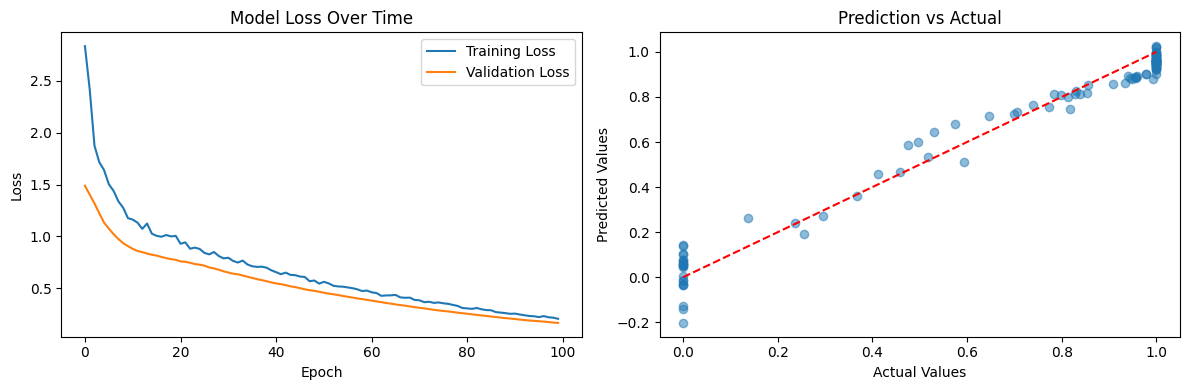

In [35]:
monthly_spending_lower = pd.read_csv('dataset/monthly_spending_lower_labeled.csv')
monthly_spending_upper = pd.read_csv('dataset/monthly_spending_upper_labeled.csv')
    
    # Train and evaluate model
model, scaler, history, metrics = train_expense_classifier(
        monthly_spending_lower, monthly_spending_upper
    )


Overall Model Performance:
mse: 0.0070
rmse: 0.0837
mae: 0.0610
r2: 0.9560
accuracy: 0.9541
precision: 0.9367
recall: 1.0000
f1: 0.9673

Network Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,437 (134.52 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 22,660 (88.52 KB)

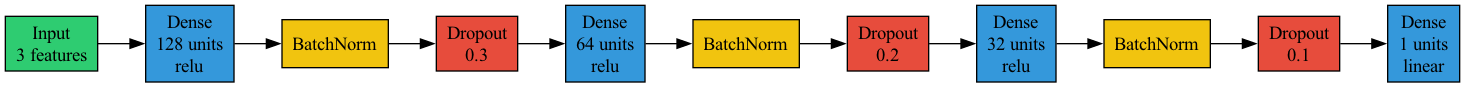

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Lower Income Spending Analysis:
        Category  Percent_Spend  Deviation  Raw_Score Prediction
            Food      43.243243   3.243243   1.158530       Good
       Household      21.621622  -8.378378   0.663360       Good
          Beauty      16.216216  12.216216   0.335048        Bad
   Entertainment      13.513514   8.513514   0.531053        Bad
Health & Fitness       5.405405   0.405405   0.959223       Good
      Investment       0.000000  -4.000000   0.932005       Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Upper Income Spending Analysis:
        Category  Percent_Spend  Deviation  Raw_Score Prediction
            Food      43.243243  33.243243   0.045714        Bad
       Household      21.621622  10.621622   0.494598        Bad
          Beauty      16.216216   8.216216   0.637413       Good
   Entertainment      13.513514  -4.486486   0.958864       Good
Health & Fitness       5.405405  -4.594595   0.965905       Good
      Investm

In [65]:
print("\nOverall Model Performance:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")

# Visualize network architecture
network_viz = visualize_network(model)

# Display the image directly in the notebook
im = Image.open("static/neural_network_architecture.png")  # Ensure the correct file path
display(im)  # This will render the image in the output cell

# Sample input data
input_data = {
    'Entertainment': 500,
    'Food': 1600,
    'Beauty': 600,
    'Health & Fitness': 200,
    'Household': 800,
    'Investment': 0
}

# Predict spending pattern for lower income
results_lower, total_spending_lower = predict_spending_pattern(model, scaler, input_data, income_level='lower')
print("\nLower Income Spending Analysis:")
print(results_lower.to_string(index=False))

# Predict spending pattern for upper income
results_upper, total_spending_upper = predict_spending_pattern(model, scaler, input_data, income_level='upper')
print("\nUpper Income Spending Analysis:")
print(results_upper.to_string(index=False))

# Generate suggested spending pattern for lower income
suggested_spending_lower = suggest_spending_pattern(results_lower, total_spending_lower, input_data)
summary_lower = summarize_results(results_lower, suggested_spending_lower)

print("\nSuggested Spending Adjustment (Lower Income):")
for category, (original, suggested) in suggested_spending_lower.items():
    print(f"{category}: {original} → {suggested}")

# Print summary for lower income
print("\nSummary for lower income:")
print(f"Categories flagged as Bad: {results_lower[results_lower['Prediction'] == 'Bad']['Category'].tolist()}")
print(f"Highest spending category: {results_lower.iloc[0]['Category']} "
      f"({results_lower.iloc[0]['Percent_Spend']:.1f}%)")

# Generate suggested spending pattern for upper income
suggested_spending_upper = suggest_spending_pattern(results_upper, total_spending_upper, input_data)
summary_upper = summarize_results(results_upper, suggested_spending_upper)

print("\nSuggested Spending Adjustment (Upper Income):")
for category, (original, suggested) in suggested_spending_upper.items():
    print(f"{category}: {original} → {suggested}")

# Print summary for upper income
print("\nSummary for upper income:")
print(f"Categories flagged as Bad: {results_upper[results_upper['Prediction'] == 'Bad']['Category'].tolist()}")
print(f"Highest spending category: {results_upper.iloc[0]['Category']} "
      f"({results_upper.iloc[0]['Percent_Spend']:.1f}%)")

# Example usage with different data
input_data = {
    'Household': 400, 'Food': 800, 'Shopping': 150, 'Transportation': 100,
    'Health & Fitness': 100, 'Entertainment': 200, 'Beauty': 300, 'Investment': 0
}

results, total_spending = predict_spending_pattern(model, scaler, input_data, income_level='lower')
suggested_spending = suggest_spending_pattern(results, total_spending, input_data)
summary = summarize_results(results, suggested_spending)

print("\nSuggested Spending Adjustment (Example Data):")
for category, (original, suggested) in suggested_spending.items():
    print(f"{category}: {original} → {suggested}")


In [19]:
model.save_weights('fuzz_dnn_weights.weights.h5')
model.save('fuzz_dnn_full_model.keras')
# Save scaler
joblib.dump(scaler, 'fuzzy_dnn_scaler.pkl')

['fuzzy_dnn_scaler.pkl']


🔹 Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.50      0.75      0.60         4

    accuracy                           0.56         9
   macro avg       0.58      0.57      0.55         9
weighted avg       0.59      0.56      0.54         9


🔹 Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9



/Users/aashu/Desktop/Aashu/SRM/SEM-VI/Project/Financial-Model/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

🔹 Binary Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.57      1.00      0.73         4

    accuracy                           0.67         9
   macro avg       0.79      0.70      0.65         9
weighted avg       0.81      0.67      0.64         9

Epoch 1/100


/Users/aashu/Desktop/Aashu/SRM/SEM-VI/Project/Financial-Model/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.3889 - mae: 1.2525 - val_loss: 1.4076 - val_mae: 0.6787
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4823 - mae: 0.9797 - val_loss: 1.3425 - val_mae: 0.6375
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9634 - mae: 0.8336 - val_loss: 1.2738 - val_mae: 0.5941
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7348 - mae: 0.7476 - val_loss: 1.1938 - val_mae: 0.5367
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5447 - mae: 0.6466 - val_loss: 1.1310 - val_mae: 0.4905
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4933 - mae: 0.6468 - val_loss: 1.0847 - val_mae: 0.4554
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3504 - mae: 0.5811 - val_loss: 1.0523 - val_mae: 0.4320
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3762 - mae: 0.5874 - val_loss: 0.9937 - val_mae: 0.3744
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2797 - mae: 0

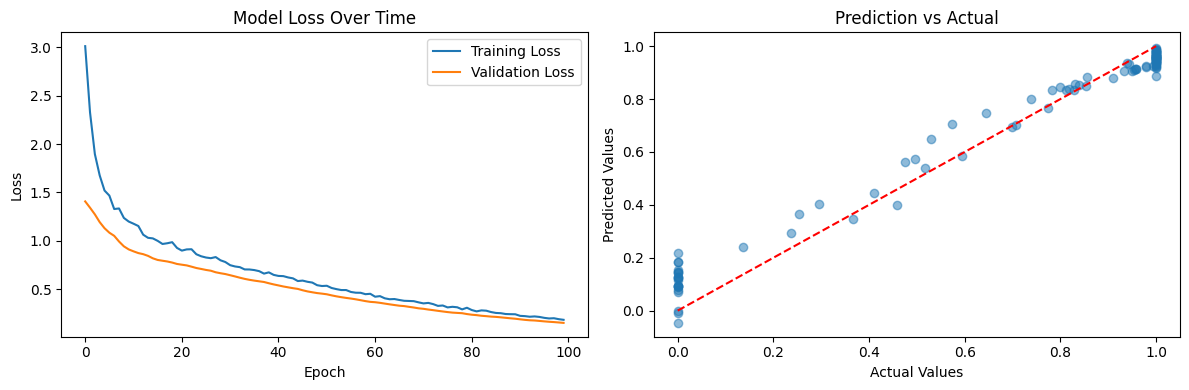

{'Accuracy': [0.5555555555555556, 0.6666666666666666, 0.6666666666666666, np.float64(0.981651376146789)], 'Precision': [0.5, 0.6, 0.5714285714285714, 0.9736842105263158], 'Recall': [0.75, 0.75, 1.0, 1.0], 'F1 Score': [0.6, 0.6666666666666666, 0.7272727272727273, 0.9866666666666667], 'Mean Squared Error (MSE)': [None, None, None, 0.005328062805446139], 'Root Mean Squared Error (RMSE)': [None, None, None, np.float64(0.07299358057696675)], 'Mean Absolute Error (MAE)': [None, None, None, 0.05835766288171252], 'R² Score': [None, None, None, 0.9665477367332507]}


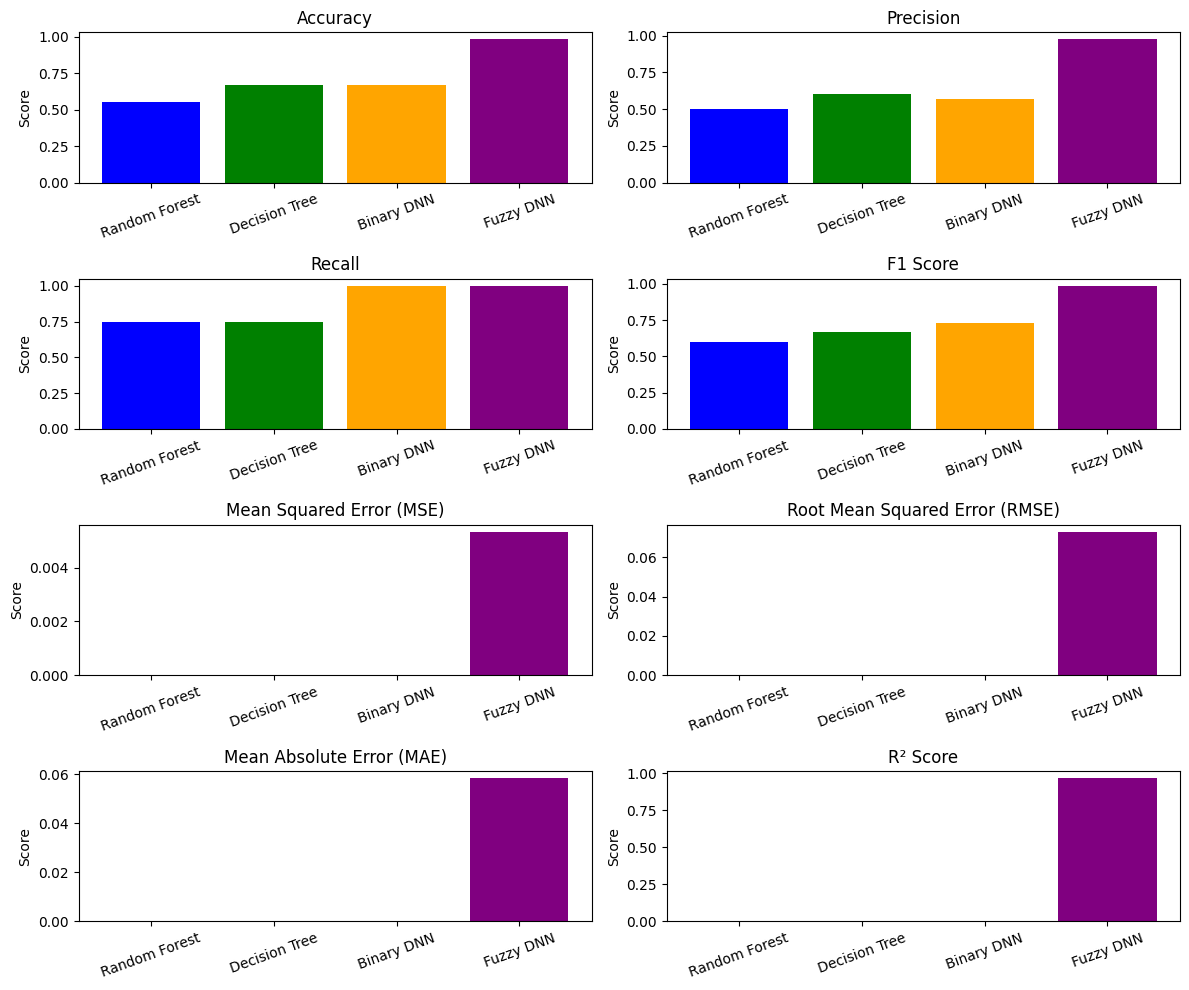

In [37]:
# Scale data for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 📌 1️⃣ Train and Evaluate Random Forest
optimized_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=38,
    max_features=None,
    min_samples_leaf=8,
    min_samples_split=8,
    n_estimators=171,
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)
rf_predictions = optimized_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("\n🔹 Optimized Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

### 📌 2️⃣ Train and Evaluate Decision Tree
optimised_dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=38,
    max_features=None,
    min_samples_split=8,
    random_state=42
)

optimised_dt_model.fit(X_train, y_train)
dt_predictions = optimised_dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("\n🔹 Optimized Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

### 📌 3️⃣ Train and Evaluate Binary Classification DNN
binary_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(1, activation='sigmoid')  # Binary classification output
])

binary_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_binary = binary_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Binary DNN
y_pred_prob = binary_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)

print("\n🔹 Binary Neural Network Classification Report:")
print(classification_report(y_test, y_pred))

# Train Fuzzy DNN and get its metrics
fuzzy_model, fuzzy_scaler, fuzzy_history, fuzzy_metrics = train_expense_classifier(
    monthly_spending_lower, monthly_spending_upper
)

# Extract Fuzzy DNN metrics
fuzzy_accuracy = fuzzy_metrics.get('accuracy', None)
fuzzy_precision = fuzzy_metrics.get('precision', None)
fuzzy_recall = fuzzy_metrics.get('recall', None)
fuzzy_f1 = fuzzy_metrics.get('f1', None)
fuzzy_mse = fuzzy_metrics.get('mse', None)
fuzzy_rmse = fuzzy_metrics.get('rmse', None)
fuzzy_mae = fuzzy_metrics.get('mae', None)
fuzzy_r2 = fuzzy_metrics.get('r2', None)

# Models
models = ['Random Forest', 'Decision Tree', 'Binary DNN', 'Fuzzy DNN']

# Classification Metrics (Higher is better)
accuracies = [rf_accuracy, dt_accuracy, nn_accuracy, fuzzy_accuracy]
precisions = [rf_precision, dt_precision, nn_precision, fuzzy_precision]  # Precision N/A for regression
recalls = [rf_recall, dt_recall, nn_recall, fuzzy_recall]  # Recall N/A for regression
f1_scores = [rf_f1, dt_f1, nn_f1, fuzzy_f1]  # F1 Score N/A for regression

# Regression Metrics (Lower is better except R²)
mse = [None, None, None, fuzzy_mse]
rmse = [None, None, None, fuzzy_rmse]
mae = [None, None, None, fuzzy_mae]
r2 = [None, None, None, fuzzy_r2]  # Higher is better

# Define metrics and their values
metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2
}

print(metrics)

# Plot comparison for each metric
bar_width = 0.5
x_indexes = np.arange(len(models))

plt.figure(figsize=(12, 10))
for i, (metric_name, values) in enumerate(metrics.items()):
    plt.subplot(4, 2, i + 1)
    plt.bar(x_indexes, [v if v is not None else 0 for v in values], color=['blue', 'green', 'orange', 'purple'])
    plt.xticks(x_indexes, models, rotation=20)
    plt.ylabel("Score")
    plt.title(metric_name)

plt.tight_layout()
plt.show()


Epoch 1/100


/Users/aashu/Desktop/Aashu/SRM/SEM-VI/Project/Financial-Model/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.2448 - mae: 1.2188 - val_loss: 1.3959 - val_mae: 0.6820
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6309 - mae: 1.0512 - val_loss: 1.3256 - val_mae: 0.6402
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9919 - mae: 0.8545 - val_loss: 1.2120 - val_mae: 0.5688
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7965 - mae: 0.7709 - val_loss: 1.1131 - val_mae: 0.4988
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4893 - mae: 0.6618 - val_loss: 1.0312 - val_mae: 0.4295
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3716 - mae: 0.5800 - val_loss: 0.9676 - val_mae: 0.3626
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4523 - mae: 0.6223 - val_loss: 0.9199 - val_mae: 0.2993
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3250 - mae: 0.5639 - val_loss: 0.9014 - val_mae: 0.2729
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2194 -

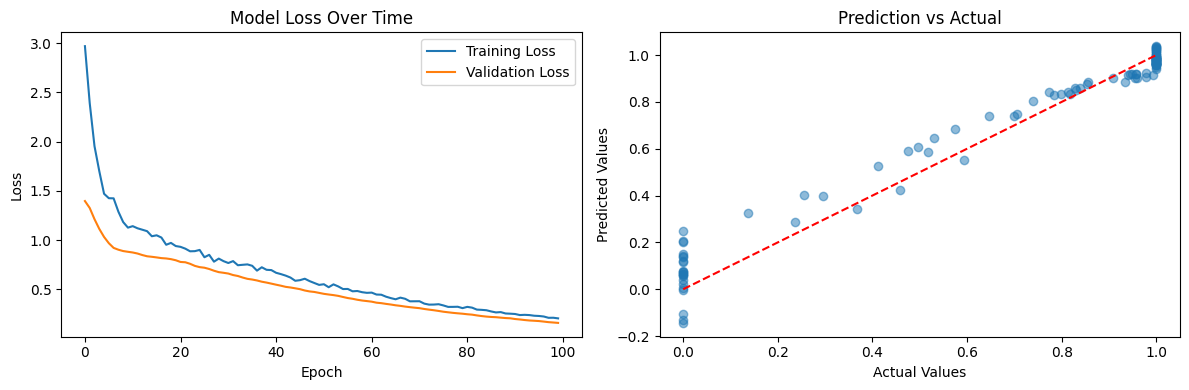

In [17]:
# Train Fuzzy DNN and get its metrics
fuzzy_model, fuzzy_scaler, fuzzy_history, fuzzy_metrics = train_expense_classifier(
    monthly_spending_lower, monthly_spending_upper
)

In [17]:
# Sample input data
input_data = {
    'Entertainment': 500,
    'Food': 1600,
    'Beauty': 600,
    'Health & Fitness': 200,
    'Household': 800,
    'Investment': 0
}

# Predict spending pattern for lower income
results_lower, total_spending_lower = predict_spending_pattern(fuzzy_model, fuzzy_scaler, input_data, income_level='lower')
print("\nLower Income Spending Analysis:")
print(results_lower.to_string(index=False))

# Predict spending pattern for upper income
results_upper, total_spending_upper = predict_spending_pattern(fuzzy_model, fuzzy_scaler, input_data, income_level='upper')
print("\nUpper Income Spending Analysis:")
print(results_upper.to_string(index=False))

# Generate suggested spending pattern for lower income
suggested_spending_lower = suggest_spending_pattern(results_lower, total_spending_lower, input_data)
summary_lower = summarize_results(results_lower, suggested_spending_lower)

print("\nSuggested Spending Adjustment (Lower Income):")
for category, (original, suggested) in suggested_spending_lower.items():
    print(f"{category}: {original} → {suggested}")

# Print summary for lower income
print("\nSummary for lower income:")
print(f"Categories flagged as Bad: {results_lower[results_lower['Prediction'] == 'Bad']['Category'].tolist()}")
print(f"Highest spending category: {results_lower.iloc[0]['Category']} "
      f"({results_lower.iloc[0]['Percent_Spend']:.1f}%)")

# Generate suggested spending pattern for upper income
suggested_spending_upper = suggest_spending_pattern(results_upper, total_spending_upper, input_data)
summary_upper = summarize_results(results_upper, suggested_spending_upper)

print("\nSuggested Spending Adjustment (Upper Income):")
for category, (original, suggested) in suggested_spending_upper.items():
    print(f"{category}: {original} → {suggested}")

# Print summary for upper income
print("\nSummary for upper income:")
print(f"Categories flagged as Bad: {results_upper[results_upper['Prediction'] == 'Bad']['Category'].tolist()}")
print(f"Highest spending category: {results_upper.iloc[0]['Category']} "
      f"({results_upper.iloc[0]['Percent_Spend']:.1f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Lower Income Spending Analysis:
        Category  Percent_Spend  Deviation  Raw_Score Prediction
            Food      43.243243   3.243243   0.943734       Good
       Household      21.621622  -8.378378   0.693760       Good
          Beauty      16.216216  12.216216   0.307030        Bad
   Entertainment      13.513514   8.513514   0.539816        Bad
Health & Fitness       5.405405   0.405405   0.944139       Good
      Investment       0.000000  -4.000000   0.914012       Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Upper Income Spending Analysis:
        Category  Percent_Spend  Deviation  Raw_Score Prediction
            Food      43.243243  33.243243   0.058140        Bad
       Household      21.621622  10.621622   0.455646        Bad
          Beauty      16.216216   8.216216   0.633015       Good
   Entertainment      13.513514  -4.486486   0.919157       Good
Health & Fitness       5.405405  -4.594595   0.995584       Good
      Investm

KeyError: 'predicted_prob'

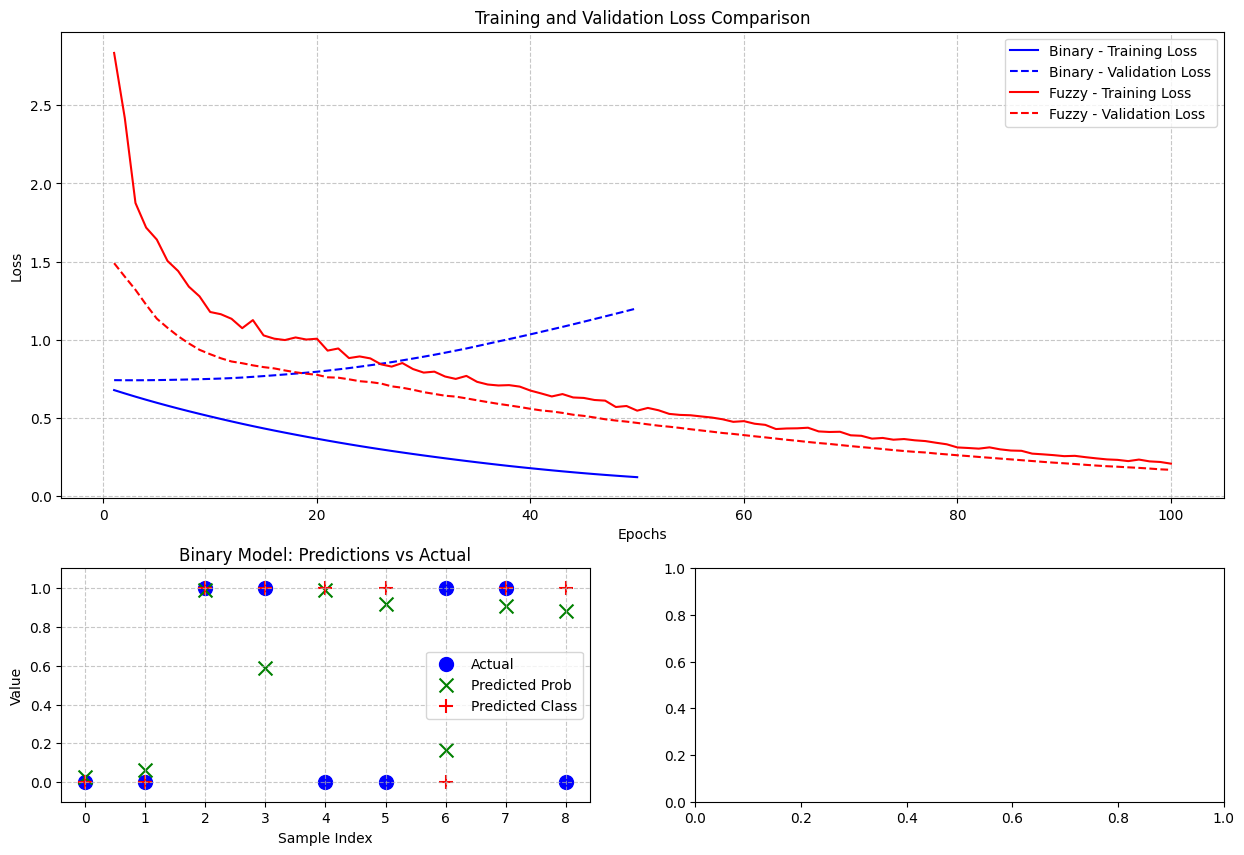

In [36]:
#comparing binary and fuzzy
import matplotlib.gridspec as gridspec

# Function to load data from JSON files
def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Load data from the JSON files
# Replace these paths with your actual file paths
binary_data = load_data('graph_data_bin.json')
fuzzy_data = load_data('graph_data_fuzz.json')

# Create a figure with a grid layout
plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

# 1. Training and Validation Loss Comparison
ax1 = plt.subplot(gs[0, :])
epochs_bin = binary_data['loss_data']['epochs']
train_loss_bin = binary_data['loss_data']['training_loss']
val_loss_bin = binary_data['loss_data']['validation_loss']

epochs_fuzz = fuzzy_data['loss_data']['epochs']
train_loss_fuzz = fuzzy_data['loss_data']['training_loss']
val_loss_fuzz = fuzzy_data['loss_data']['validation_loss']

ax1.plot(epochs_bin, train_loss_bin, 'b-', label='Binary - Training Loss')
ax1.plot(epochs_bin, val_loss_bin, 'b--', label='Binary - Validation Loss')
ax1.plot(epochs_fuzz, train_loss_fuzz, 'r-', label='Fuzzy - Training Loss')
ax1.plot(epochs_fuzz, val_loss_fuzz, 'r--', label='Fuzzy - Validation Loss')

ax1.set_title('Training and Validation Loss Comparison')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

# 2. Binary Model Predictions vs Actual
ax2 = plt.subplot(gs[1, 0])
actual_bin = binary_data['prediction_data']['actual']
pred_prob_bin = binary_data['prediction_data']['predicted_prob']
pred_class_bin = binary_data['prediction_data']['predicted_class']

# Create indices for x-axis
indices_bin = list(range(len(actual_bin)))

# Plot actual values
ax2.scatter(indices_bin, actual_bin, color='blue', marker='o', s=100, label='Actual')

# Plot predicted probabilities
ax2.scatter(indices_bin, pred_prob_bin, color='green', marker='x', s=100, label='Predicted Prob')

# Plot predicted classes
ax2.scatter(indices_bin, pred_class_bin, color='red', marker='+', s=100, label='Predicted Class')

ax2.set_title('Binary Model: Predictions vs Actual')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Value')
ax2.set_ylim(-0.1, 1.1)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

# 3. Fuzzy Model Predictions vs Actual
ax3 = plt.subplot(gs[1, 1])
actual_fuzz = fuzzy_data['prediction_data']['actual']
pred_prob_fuzz = fuzzy_data['prediction_data']['predicted_prob']
pred_class_fuzz = fuzzy_data['prediction_data']['predicted_class']

# Create indices for x-axis
indices_fuzz = list(range(len(actual_fuzz)))

# Plot actual values
ax3.scatter(indices_fuzz, actual_fuzz, color='blue', marker='o', s=100, label='Actual')

# Plot predicted probabilities
ax3.scatter(indices_fuzz, pred_prob_fuzz, color='green', marker='x', s=100, label='Predicted Prob')

# Plot predicted classes
ax3.scatter(indices_fuzz, pred_class_fuzz, color='red', marker='+', s=100, label='Predicted Class')

ax3.set_title('Fuzzy Model: Predictions vs Actual')
ax3.set_xlabel('Sample Index')
ax3.set_ylabel('Value')
ax3.set_ylim(-0.1, 1.1)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.legend()

# Adjust layout
plt.tight_layout()

# Add a subtitle explaining the visualizations
plt.figtext(0.5, 0.01, 
            "Top: Loss comparison between binary and fuzzy approaches.\n"
            "Bottom Left: Binary model's prediction performance.\n"
            "Bottom Right: Fuzzy model's prediction performance.", 
            ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Save figure
plt.savefig('binary_vs_fuzzy_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()